In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
sns.set_style('darkgrid')

In [134]:
df1 = pd.read_csv('Sensor_FieldPRO.csv')
df1

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature
0,2020-09-30T23:00:00Z,38.0,31.366,9412,0,45123,30
1,2020-10-01T00:00:00Z,NaN,NaN,9412,0,45025,31
2,2020-10-01T01:00:00Z,39.0,31.366,9419,0,44923,31
3,2020-10-01T02:00:00Z,39.0,31.322,9419,0,44825,31
4,2020-10-01T03:00:00Z,38.0,31.240,9416,0,44728,31
...,...,...,...,...,...,...,...
1706,2020-12-11T09:00:00Z,82.0,19.480,9422,3,20669,17
1707,2020-12-11T10:00:00Z,69.0,24.000,9429,3,20606,19
1708,2020-12-11T11:00:00Z,63.0,25.440,9436,3,20529,25
1709,2020-12-11T12:00:00Z,60.0,27.160,9439,3,20442,28


In [135]:
df2 = pd.read_csv('Estacao_Convencional.csv')
df2

,data,Hora (Brasília),chuva
0,2020-09-01,00:00:00,0.0
1,2020-09-01,01:00:00,0.0
2,2020-09-01,02:00:00,0.0
3,2020-09-01,03:00:00,0.0
4,2020-09-01,04:00:00,0.0
...,...,...,...
2251,2020-12-03,19:00:00,0.0
2252,2020-12-03,20:00:00,0.0
2253,2020-12-03,21:00:00,0.0
2254,2020-12-03,22:00:00,0.0


In [136]:
df1['date'] = pd.to_datetime(df1['Datetime – utc'])
df1 = df1.drop('Datetime – utc',axis=1)

In [137]:
df1

,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature,date
0,38.0,31.366,9412,0,45123,30,2020-09-30 23:00:00+00:00
1,NaN,NaN,9412,0,45025,31,2020-10-01 00:00:00+00:00
2,39.0,31.366,9419,0,44923,31,2020-10-01 01:00:00+00:00
3,39.0,31.322,9419,0,44825,31,2020-10-01 02:00:00+00:00
4,38.0,31.240,9416,0,44728,31,2020-10-01 03:00:00+00:00
...,...,...,...,...,...,...,...
1706,82.0,19.480,9422,3,20669,17,2020-12-11 09:00:00+00:00
1707,69.0,24.000,9429,3,20606,19,2020-12-11 10:00:00+00:00
1708,63.0,25.440,9436,3,20529,25,2020-12-11 11:00:00+00:00
1709,60.0,27.160,9439,3,20442,28,2020-12-11 12:00:00+00:00


In [138]:
s = df2['data'] + ' ' + df2['Hora (Brasília)']
s[0]

'2020-09-01 00:00:00'

In [139]:
df2['date'] = pd.to_datetime(s)
df2 = df2.drop('data',axis=1)
df2 = df2.drop('Hora (Brasília)',axis=1)

In [140]:
df2

,chuva,date
0,0.0,2020-09-01 00:00:00
1,0.0,2020-09-01 01:00:00
2,0.0,2020-09-01 02:00:00
3,0.0,2020-09-01 03:00:00
4,0.0,2020-09-01 04:00:00
...,...,...
2251,0.0,2020-12-03 19:00:00
2252,0.0,2020-12-03 20:00:00
2253,0.0,2020-12-03 21:00:00
2254,0.0,2020-12-03 22:00:00


In [141]:
df1.describe()

,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature
count,1705.000000,1705.000000,1711.000000,1711.000000,1711.000000,1711.000000
mean,60.238710,24.660940,9432.838106,1.646406,42462.030392,24.910579
std,22.100228,6.174219,26.378333,1.090382,13038.238287,8.374122
min,13.000000,12.360000,9350.000000,0.000000,16950.000000,11.000000
25%,41.000000,19.900000,9416.000000,1.000000,32020.000000,18.000000
50%,61.000000,23.020000,9433.000000,2.000000,41765.000000,22.000000
75%,80.000000,29.400000,9450.000000,3.000000,53769.000000,32.000000
max,99.000000,42.664000,9507.000000,3.000000,65533.000000,47.000000


In [142]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   air_humidity_100     1705 non-null   float64            
 1   air_temperature_100  1705 non-null   float64            
 2   atm_pressure_main    1711 non-null   int64              
 3   num_of_resets        1711 non-null   int64              
 4   piezo_charge         1711 non-null   int64              
 5   piezo_temperature    1711 non-null   int64              
 6   date                 1711 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(2), int64(4)
memory usage: 93.7 KB


In [143]:
df2.describe()

,chuva
count,2256.000000
mean,0.065780
std,0.685743
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,16.800000


In [144]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   chuva   2256 non-null   float64       
 1   date    2256 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.4 KB


In [145]:
df1.set_index('date', inplace=True)
df2.set_index('date', inplace=True)

In [146]:
df1 = df1.tz_localize(None)
df2 = df2.tz_localize(None)

In [147]:
df = df1.merge(df2, left_index=True, right_index=True, how='inner')

In [156]:
df = df.dropna()

In [157]:
df

,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature,chuva
date,,,,,,,
2020-09-30 23:00:00,38.0,31.366,9412,0,45123,30,0.0
2020-10-01 01:00:00,39.0,31.366,9419,0,44923,31,0.0
2020-10-01 02:00:00,39.0,31.322,9419,0,44825,31,0.0
2020-10-01 03:00:00,38.0,31.240,9416,0,44728,31,0.0
2020-10-01 04:00:00,39.0,30.828,9411,0,44632,30,0.0
...,...,...,...,...,...,...,...
2020-12-03 19:00:00,86.0,20.880,9412,3,35217,20,0.0
2020-12-03 20:00:00,90.0,20.980,9409,3,35132,19,0.0
2020-12-03 21:00:00,93.0,20.620,9408,3,35068,20,0.0


In [158]:
df.describe()

,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature,chuva
count,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000
mean,58.628778,24.788124,9432.470434,1.492116,44211.252957,25.042707,0.093561
std,21.889347,6.305637,27.296906,1.039776,12656.546673,8.524792,0.830087
min,13.000000,12.360000,9350.000000,0.000000,16950.000000,11.000000,0.000000
25%,40.000000,19.925000,9415.000000,1.000000,34664.250000,18.000000,0.000000
50%,59.000000,23.150000,9433.000000,1.000000,43987.000000,22.000000,0.000000
75%,78.000000,29.720000,9451.000000,2.000000,55026.750000,32.000000,0.000000
max,99.000000,42.664000,9507.000000,3.000000,65533.000000,47.000000,16.800000


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1522 entries, 2020-09-30 23:00:00 to 2020-12-03 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   air_humidity_100     1522 non-null   float64
 1   air_temperature_100  1522 non-null   float64
 2   atm_pressure_main    1522 non-null   int64  
 3   num_of_resets        1522 non-null   int64  
 4   piezo_charge         1522 non-null   int64  
 5   piezo_temperature    1522 non-null   int64  
 6   chuva                1522 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 95.1 KB


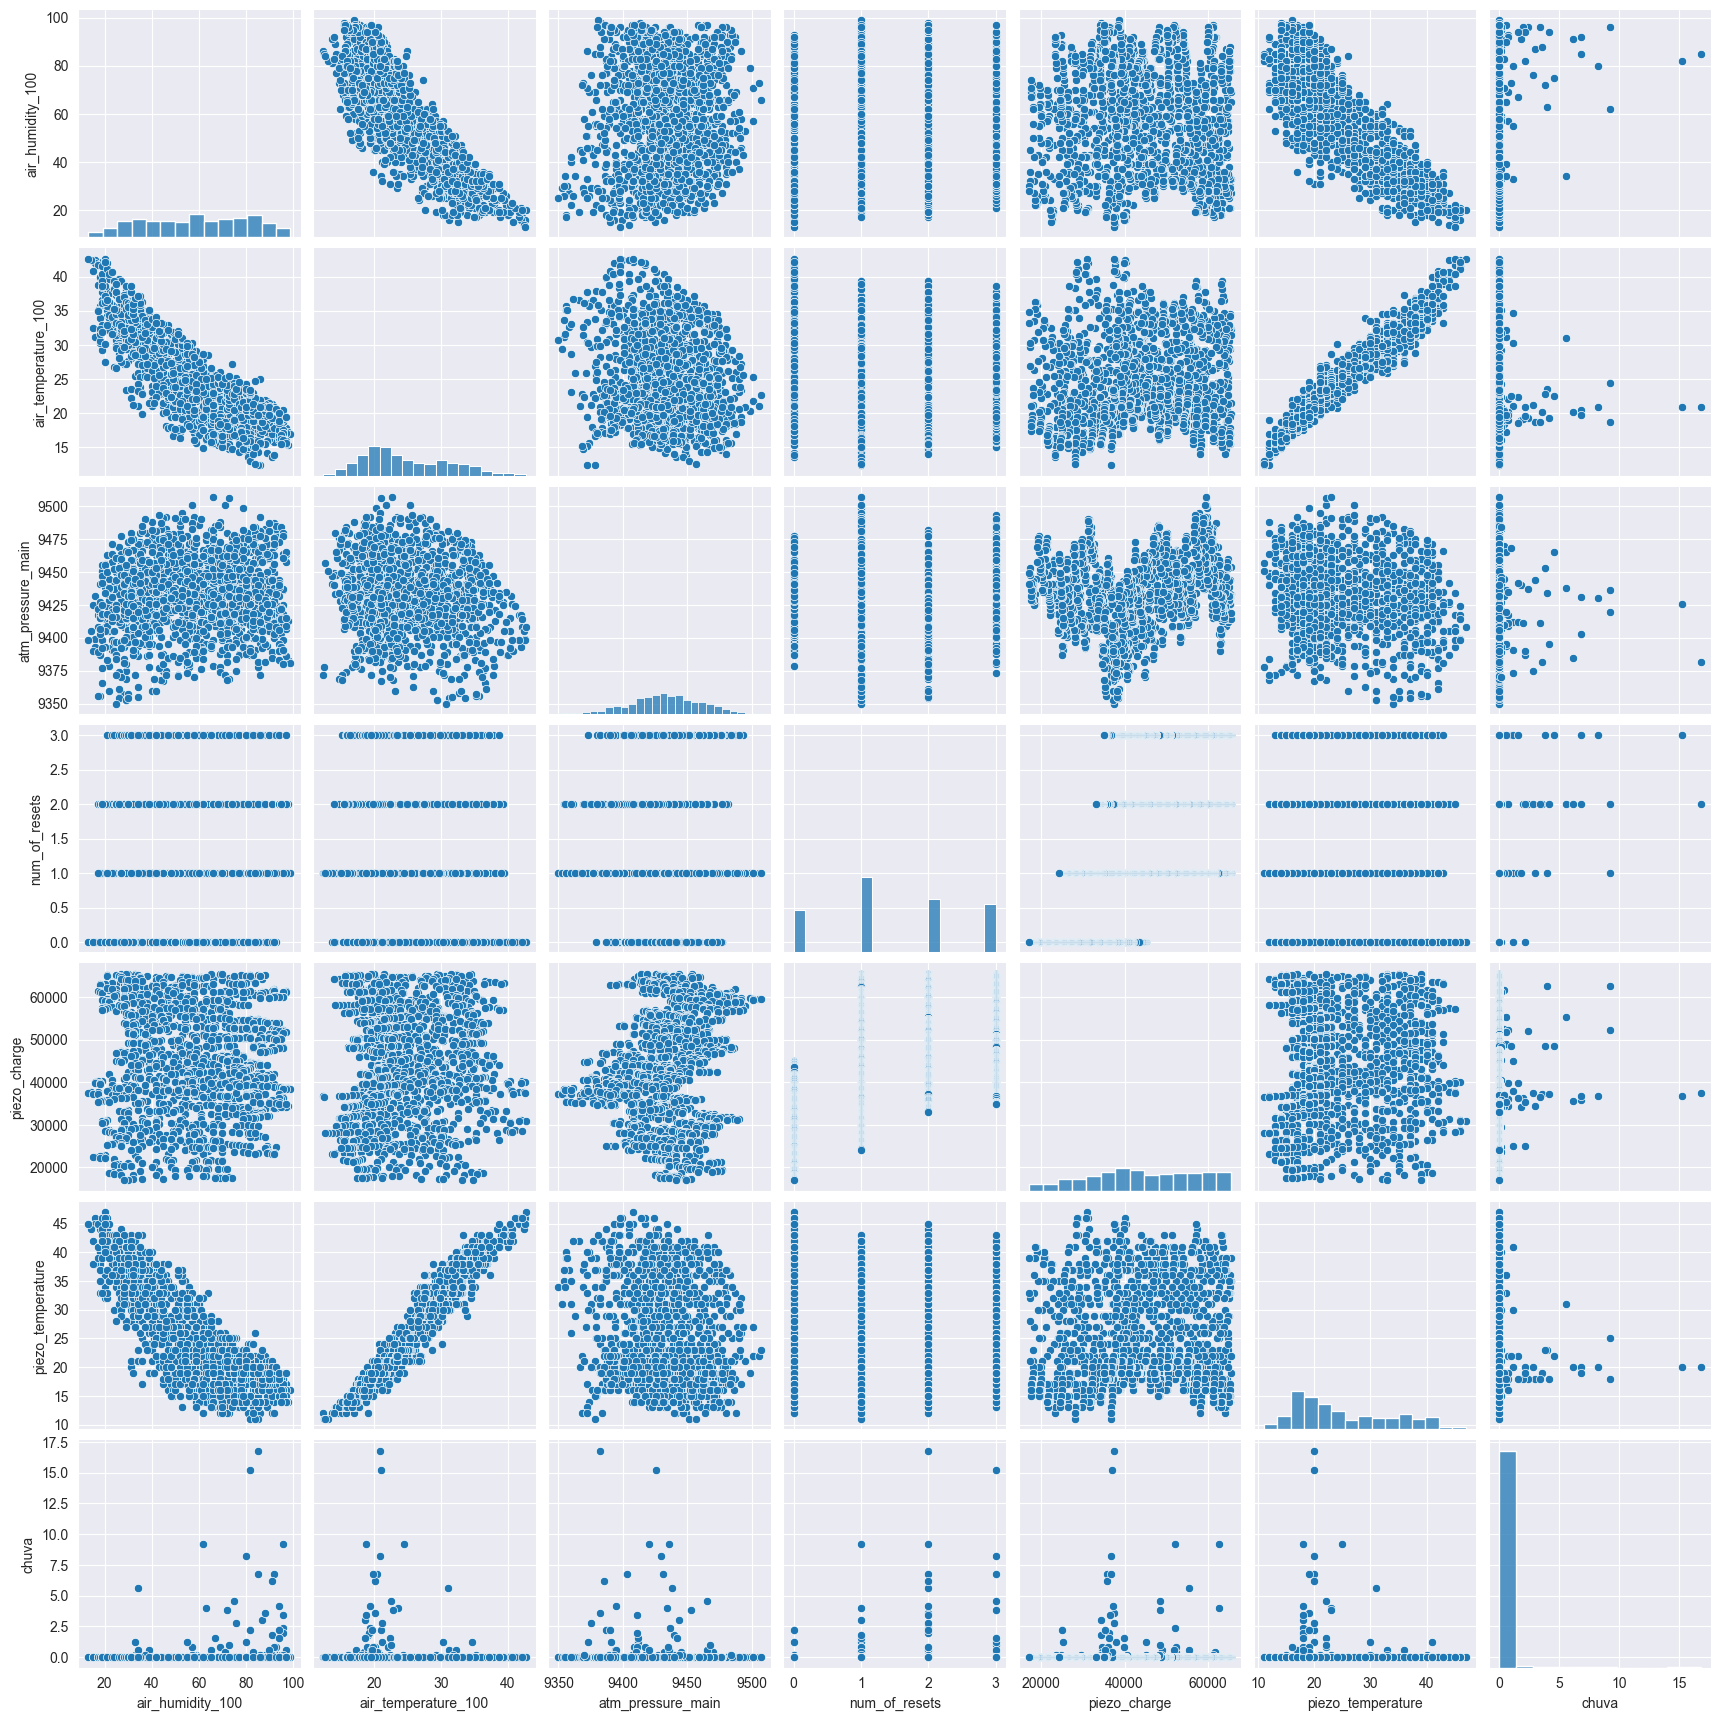

In [160]:
sns.pairplot(df)

In [161]:
df.corr()['piezo_charge'].sort_values()

air_humidity_100      -0.039123
chuva                 -0.018817
piezo_temperature      0.035875
air_temperature_100    0.038053
atm_pressure_main      0.228123
num_of_resets          0.546959
piezo_charge           1.000000
Name: piezo_charge, dtype: float64

In [163]:
df.columns

Index(['air_humidity_100', 'air_temperature_100', 'atm_pressure_main',
       'num_of_resets', 'piezo_charge', 'piezo_temperature', 'chuva'],
      dtype='object')

In [164]:
X = df[['air_humidity_100', 'air_temperature_100', 'atm_pressure_main',
       'num_of_resets', 'piezo_temperature', 'chuva']]
y = df['piezo_charge']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
lm = LinearRegression()

In [166]:
lm.fit(X_train,y_train)

LinearRegression()

In [167]:
lm.intercept_

-756727.1338104222

In [168]:
lm.coef_

array([-104.91695035,  446.76532125,   84.51310985, 6741.20520124,
       -448.67975663, -221.14654292])

In [169]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
air_humidity_100,-104.916950
air_temperature_100,446.765321
atm_pressure_main,84.513110
num_of_resets,6741.205201
piezo_temperature,-448.679757
chuva,-221.146543


In [170]:
pred = lm.predict(X_test)

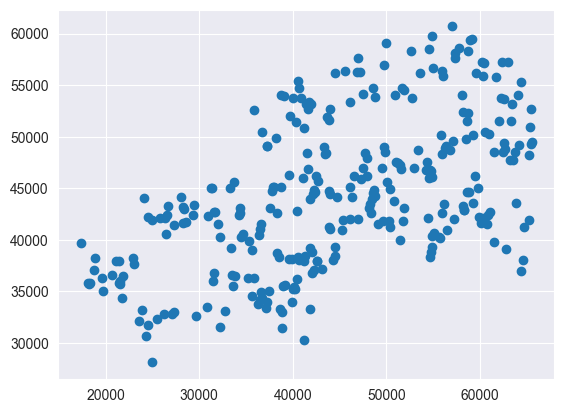

In [171]:
plt.scatter(y_test,pred)

In [172]:
metrics.mean_absolute_error(y_test,pred)

8572.756622671082